In [1]:
using PyPlot
using JLD

include("../src/PDMP.jl")
using PDMP
using Klara

# LOCAL BPS
___

In [2]:
function showHist(evl::Vector{PDMP.EventList}, vi::Int64, Ns::Int64, 
                    mu=0.0, sigma=1.0, lb=-10., ub=10.)
    vi = 1
    Ns = 5000
    xs = PDMP.samplelocalpath(evl[vi], linspace(0,evl[vi].ts[end],Ns))

    PyPlot.plt[:hist](xs,Int(ceil(0.5*sqrt(Ns))),normed=true)
    
    xx = linspace(-10,10,500)
    yy = exp(-(xx-mu).^2/(2. * sigma^2))/sqrt(2pi * sigma^2)
    plot(xx,yy)
    nothing
end
;

## LBPS1 - Chain of (indep) Gaussians
___

`ex_lbps_gausschain1.jl`

Three factors, each with a gaussian likelihood.



In [3]:
d = load("res/dex_lbps_gausschain1.jld")

evl     = d["evlist"]
details = d["details"]


Dict{String,Any} with 5 entries:
  "ev_secondbranch" => 150
  "ev_firstbranch"  => 9850
  "clocktime"       => 0.807556
  "nevents"         => 10000
  "globalclock"     => 7.57146e7

### Histogram 
Sample one of the factor and show what it looks like

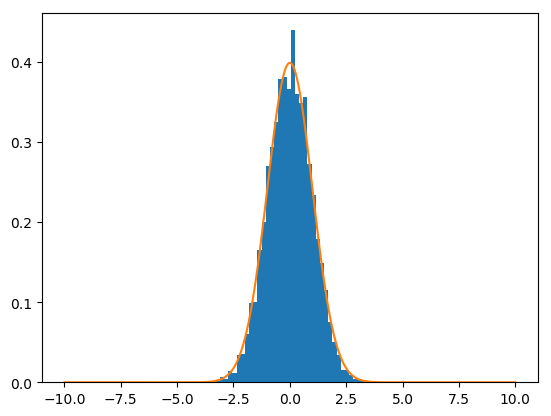

In [4]:
i = 2 
showHist(evl, i, 10000)

### ESS

In [5]:
ess = [Klara.ess(PDMP.samplelocalpath(evl[vi], linspace(0,evl[vi].ts[end], 10000))) for vi=1:3]

3-element Array{Float64,1}:
 3054.49
 4582.74
 4501.36

Can also compute per CPU sec

In [6]:
ess/details["clocktime"]

3-element Array{Float64,1}:
 3782.39
 5674.83
 5574.05